<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/data_structure_and_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### "Big O" Notation

In [ ]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

#### Постоянное время

In [ ]:
def take_first(my_list):
    return my_list[0]

short_list = [13, 25, 42]

tic = time.process_time()
first = take_first(short_list)
toc = time.process_time()

print(tic)
print(first)
print(toc-tic)

19.508444504
13
6.237799999908589e-05


In [ ]:
import time

def process_large_list():
    return [x**2 for x in range(1000000)]

tic = time.process_time()
result = process_large_list()
toc = time.process_time()

print(f"Время выполнения: {toc-tic:.6f} секунд")

Время выполнения: 0.094601 секунд


In [ ]:
long_list = [42] * 10**8 # one hundred million items
len(long_list)

100000000

In [ ]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

toc-tic

7.47069999995631e-05

In [ ]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
constant_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()

    constant_times.append(toc-tic)

In [ ]:
import time
import pandas as pd

def take_first(my_list):
    return my_list[0]

def accurate_measurement(list_lengths, iterations=1000):
    constant_times = []

    for l in list_lengths:
        lst = [42] * l

        total_time = 0
        for _ in range(iterations):
            tic = time.perf_counter()
            x = take_first(lst)
            toc = time.perf_counter()
            total_time += (toc - tic)

        avg_time = total_time / iterations
        constant_times.append(avg_time)

        print(f"n={l:>8}: {avg_time:.2e} сек")

    return pd.DataFrame({'n': list_lengths, 'время': constant_times})

list_lengths = [10, 100, 1000, 10000, 100000, 1000000]
constant_df = accurate_measurement(list_lengths, iterations=10000)
print("\nУсовершенствованные результаты:")
print(constant_df)

n=      10: 1.48e-07 сек
n=     100: 1.53e-07 сек
n=    1000: 2.05e-07 сек
n=   10000: 1.80e-07 сек
n=  100000: 1.69e-07 сек
n= 1000000: 1.53e-07 сек

Усовершенствованные результаты:
         n         время
0       10  1.475941e-07
1      100  1.525356e-07
2     1000  2.047261e-07
3    10000  1.797626e-07
4   100000  1.686490e-07
5  1000000  1.529304e-07


#### Линейное время

In [ ]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

toc-tic

6.826599999953942e-05

In [ ]:
largest

42

In [ ]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [ ]:
toc-tic

4.166514806999999

In [ ]:
linear_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()

    linear_times.append(toc-tic)

linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'время'])
linear_df

,n,время
0,10,0.000432
1,100,0.000007
2,1000,0.000061
3,10000,0.000696
4,100000,0.006021
5,1000000,0.042832


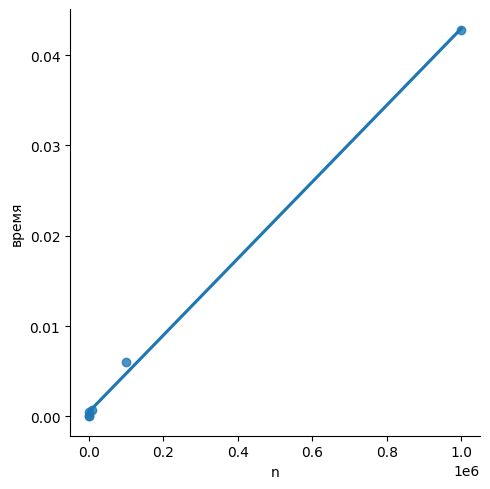

In [ ]:
_ = sns.lmplot(x='n', y='время', data=linear_df, ci=None) # линейная модель (регрессия) граф к

Полиномиальное время

In [ ]:
def element_multiplier(my_list):
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

print(list_lengths)
print(list_lengths[:4])

[10, 100, 1000, 10000, 100000, 1000000]
[10, 100, 1000, 10000]


In [ ]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'время'])
poly_df

,n,время
0,10,0.000022
1,50,0.000121
2,100,0.000768
3,500,0.014392
4,1000,0.062596
5,5000,1.556218
6,10000,7.352700


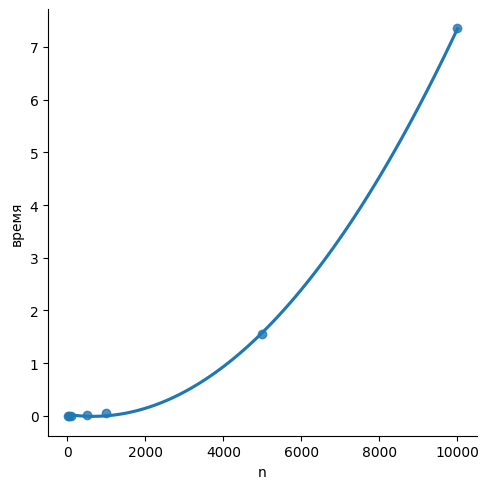

In [ ]:
_ = sns.lmplot(x='n', y='время', data=poly_df, ci=None, order=2)

**In Big O итоги**:

* Константа: O(1)
* Линейное: O($n$)
* Полиноминальное: O($n^2$)

**Другие виды**

* Логарифмическое: O(log $n$)
* Экспонинциальное: O($2^n$)
* O($n$ log $n$)
* O($n!$)

#### Структуры данных на основе списков

In [ ]:
# список
t = [25, 2, 5]
print(t)
t.append(26)
print(t)
print(t[2])
# математические операции проводить нельзя (t/2)

[25, 2, 5]
[25, 2, 5, 26]
5


In [ ]:
# массивы
x = np.array([12,34,23])
print(x)
print(x[2])
print(x/2)

[12 34 23]
23
[ 6.  17.  11.5]


In [ ]:
y = torch.tensor([[2,3,5],[1,4,7]])
print(y)
print(y[0,2])
print(y/2)

tensor([[2, 3, 5],
        [1, 4, 7]])
tensor(5)
tensor([[1.0000, 1.5000, 2.5000],
        [0.5000, 2.0000, 3.5000]])


In [ ]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
print(z)
print(z[1,0,0])
print(z/2)

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float16, numpy=
array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[25., 26.],
        [ 7.,  9.]]], dtype=float16)>
tf.Tensor(25.0, shape=(), dtype=float16)
tf.Tensor(
[[[ 0.   0.5]
  [ 1.   1.5]]

 [[12.5 13. ]
  [ 3.5  4.5]]], shape=(2, 2, 2), dtype=float16)


In [ ]:
np.append(x, 26) #O(1) добавить элемент в конец списка

array([12, 34, 23, 26])

но добавлять в начало или середину длинного списка нецелесообразно, так как более поздние элементы нужно будет перенести в конец списка. Наихудший вариант - вставка в начале списка, которая имеет сложность O ($n$).
Помимо добавления, доступ к элементу массива по индексу или определение длины массива равны O(1).

#### Очередь

In [ ]:
f = []
f

[]

In [ ]:
f.append('пять крести')
f

['пять крести']

In [ ]:
f.append('семерка черва')
f

['пять крести', 'семерка черва']

In [ ]:
f.append("десятка козырь")
f

['пять крести', 'семерка черва', 'десятка козырь']

In [ ]:
f.pop()

'десятка козырь'

In [ ]:
f

['пять крести', 'семерка черва']

При обычных обстоятельствах единственный способ найти значение (например, 25) — это искать элемент за элементом. В худшем случае это имеет сложность O(n) (например, если бы мы искали 25 в массиве b с конца).

Однако если b уже отсортирован мы можем использовать алгоритм бинарного поиска, который имеет сложность O(log n):

Начинаем с середины (b состоит из девяти элементов, поэтому середина — 5-й элемент: 14).

Так как 25 больше 14, нам нужно искать только в верхней половине b...

Таким образом, мы находим середину между 5-м и 9-м элементами, которая является 7-м элементом и оказывается 25.

Готово! Всего за два шага вместо семи (если бы мы искали последовательно с начала).

Если бы мы искали 22, то наш следующий поиск был бы на halfway между 5-м и 7-м элементами, который является 6-м элементом — и вуаля!

В нашем массиве из девяти элементов худший случай — четыре шага (для 1 или 101), чтобы найти любое значение (или определить, что значения нет в массиве).

(Примечание: называется бинарным, потому что на каждом шаге мы ищем либо выше, либо ниже.)

Удвоение n приводит только к одному дополнительному шагу в худшем случае:

n = 8 → log₂8 = 3 (8 → 4 → 2 → 1)

n = 16 → log₂16 = 4 (16 → 8 → 4 → 2 → 1)

n = 1024 → log₂1024 = 10

Отсюда O(log n), где, как обычно в компьютерных науках, мы используем log₂ (из-за бинарных битов и частого удвоения/деления пополам величин).

In [ ]:
print(np.log2(4) + 1)
print(np.log2(8) + 1)
print(np.log2(16) + 1)

3.0
4.0
5.0


Бинарный поиск — это как "угадай число" с подсказками "больше/меньше". Каждый шаг уменьшает область поиска ВДВОЕ, поэтому он такой быстрый

Данный алгоритм можно усовершенствовать с помощью *рекурсии*

In [ ]:
def recursive_binary_search(array, value, low, high):

    if low <= high:

        midpoint = (low + high) // 2

        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

b = np.array([2, 5, 14, 22, 96, 101])
recursive_binary_search(b, 22, 0, len(b)-1)

3

### Пузырьковый метод

**Бинарный поиск требует отсортированного списка**. Чтобы отсортировать список (например, от наименьшего значения к наибольшему), самым простым (и наиболее вычислительно сложным) подходом было бы сравнение каждого данного элемента со всеми остальными элементами

**Распространенная простая реализация** — это пузырьковая сортировка (bubble sort), которая позволяет самым большим значениям постепенно "всплывать" к "верху" (обычно к концу) массива.


In [ ]:
def bubble_sort(array):

  n = len(array)

  for i in range(n-1):
    for j in range(0,n-1):
      if array[j] > array[j+1]:
        array[j+1],array[j] = array[j],array[j+1]

  return array

In [ ]:
b = np.array([25,54,23,12,1,11,-54,-1263,545,5])
bubble_sort(b)

array([-1263,   -54,     1,     5,    11,    12,    23,    25,    54,
         545])

* На каждой итерации мы выполняем $n-1$ сравнений.
* Всего необходимо выполнить $n-1$ итераций.

$$ (n-1)(n-1) = n^2 -2n + 1 $$

Поскольку отбрасываются все члены, кроме старшего, это создает полиномиальную временную сложность O($n^2$) для наихудшего и среднего случаев. (Для более умных реализаций лучший случай — O($n$), так как массив уже был бы отсортирован.)



В отличие от этого, как это часто бывает в алгоритмах, существует компромисс между временной и пространственной сложностью: Пространственная сложность (использование памяти) является константной, O(1).



In [ ]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
max(granular_list_lengths)

10000

In [ ]:
random.sample(range(0,max(granular_list_lengths)),5) # выборка 5 целых чисел без замены из равномерного распределения

[9552, 1519, 6643, 5277, 9126]

In [ ]:
bubble_times = []

for l in granular_list_lengths[0:7]:
  lst = random.sample(range(0,max(granular_list_lengths)),l)

  tic = time.process_time()
  x = bubble_sort(lst)
  toc = time.process_time()

  bubble_times.append(toc-tic)

In [ ]:
bubble_df = pd.DataFrame(list(zip(granular_list_lengths, bubble_times)), columns =['n','время'])
bubble_df

,n,время
0,10,0.000030
1,50,0.000271
2,100,0.000862
3,500,0.022993
4,1000,0.087143
5,5000,2.816284
6,10000,10.028789


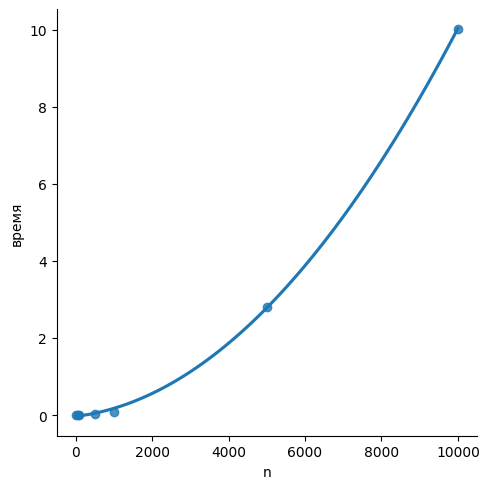

In [ ]:
_ = sns.lmplot(x='n',y='время',data=bubble_df,ci=None,order=2)

### Merge Sort (разделяй и властвуй)

Основная идея заключается в:
* Разделении массива на две половины
* Властвуй: рекурсивно сортируй каждую половину
* Обьединение отсортированных половин в один массив

In [ ]:
def merge_sort(arr):

  if len(arr) <= 1:
    return arr

  mid = len(arr) // 2
  left = merge_sort(arr[:mid])
  right = merge_sort(arr[mid:])

  return merge(left,right)

def merge(left,right):

  my_list = []
  i = j = 0

  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      my_list.append(left[i])
      i += 1
    else:
      my_list.append(right[j])
      j += 1

    my_list.extend(left[i:])
    my_list.extend(right[j:])

    return my_list

arr = random.sample(range(0,1000),25)
sorted_arr = merge_sort(arr)
np.array(sorted_arr)

array([ 78,  92, 242, 908, 970, 602, 981, 972, 388, 302, 128, 310, 467,
       206, 660, 706, 679, 840, 819, 115, 455, 616, 993, 378, 741])

Деление O(log n)

**n=8 → 8→4→2→1 → 3 уровня**

**n=16 → 16→8→4→2→1 → 4 уровня**

Объединение O(n)

Итоговая сложность O(n log n)

Уровень 0: [8,3,5,1,9,2,7,4]          ← O(n) операций

Уровень 1: [8,3,5,1] [9,2,7,4]        ← 2 × O(n/2) = O(n)

Уровень 2: [8,3][5,1] [9,2][7,4]      ← 4 × O(n/4) = O(n)

Уровень 3: [8][3][5][1][9][2][7][4]   ← 8 × O(1) = O(n)

In [ ]:
def merge_sort(arr):

  if len(arr)<=1:
    return arr

  mid = len(arr) // 2
  left = merge_sort(arr[:mid])
  right = merge_sort(arr[mid:])

  return merge(left,right)

def merge(left,right):

  my_list = []
  i = j = 0

  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      my_list.append(left[i])
      i += 1
    else:
      my_list.append(right[j])
      j+= 1

  my_list.extend(left[i:])
  my_list.extend(right[j:])

  return my_list

l = random.sample(range(0,100),10)
merge_sort(l)


[4, 10, 15, 22, 27, 34, 42, 50, 90, 98]

In [ ]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
ext_granular = granular_list_lengths + [50000,100000] # расширяем

merge_times = []

for l in ext_granular:
  lst = random.sample(range(0,max(ext_granular)),l)

  tic = time.process_time()
  x = merge_sort(lst)
  toc = time.process_time()

  merge_times.append(toc-tic)

merge_df = pd.DataFrame(list(zip(ext_granular,merge_times)),columns=['n','время'])
merge_df

,n,время
0,10,0.000043
1,50,0.000091
2,100,0.000134
3,500,0.000809
4,1000,0.002128
5,5000,0.014392
6,10000,0.024686
7,50000,0.152869
8,100000,0.353264


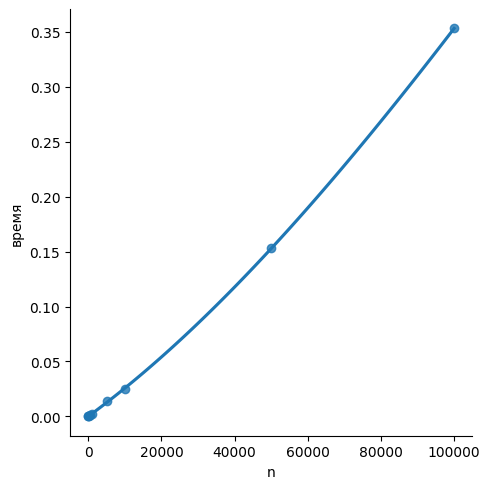

In [ ]:
_ = sns.lmplot(x='n',y='время',data = merge_df, ci = None, order =3)

In [ ]:
def quicksort(arr):

  if len(arr) <= 1 :
    return arr

  random_index = len(arr) // 2
  pivot = arr[random_index]

  left = [x for x in arr if x < pivot ]
  middle = [x for x in arr if x == pivot]
  right = [x for x in arr if x > pivot]

  return quicksort(left) + middle + quicksort(right)


arr = random.sample(range(0,100),25)
sorted_arr = quicksort(arr)
np.array(sorted_arr)

array([ 3,  4,  7, 10, 12, 14, 17, 19, 21, 26, 27, 35, 42, 44, 46, 47, 57,
       60, 61, 64, 71, 88, 92, 95, 97])

In [ ]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
a = list_lengths[:6]

In [ ]:
quicksort_time = []

for l in a :
  lst = random.sample(range(0,max(a)),l)

  tic = time.time()
  x = quicksort(lst)
  toc = time.time()

  quicksort_time.append(toc-tic)


quicksort_df = pd.DataFrame(list(zip(a,quicksort_time)),columns = ['n','время'])
quicksort_df

,n,время
0,10,0.001745
1,100,0.000754
2,1000,0.002349
3,10000,0.017217
4,100000,0.310409
5,1000000,4.192979


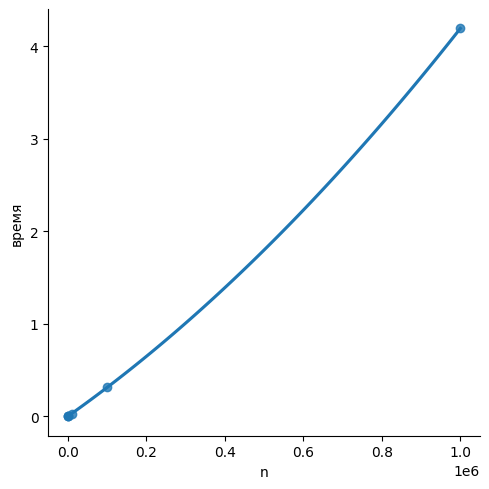

In [ ]:
_ = sns.lmplot(x='n',y='время',data = quicksort_df, ci=None, order = 2)

**Средняя временная сложность**: Эффективность быстрой сортировки достигается за счет перемещения опорных элементов (pivots) с меньшими значениями ближе к началу массива (в идеале — к середине), после чего алгоритм применяет подход "разделяй и властвуй" к обеим сторонам от опорного элемента. В этом случае (средний случай) быстрая сортировка работает аналогично сортировке слияния, то есть имеет временную сложность O(n log n), но при этом требует всего одну копию массива в памяти.

**Худшая временная сложность**: Если опорный элемент всегда выбирается последним элементом, а массив уже отсортирован, это приводит к худшему сценарию. Количество рекурсивных вызовов quick_sort() будет равно количеству элементов в массиве (то есть $n$ вызовов), и на каждом из этих вызовов будет выполняться полный цикл сравнений (аналогично пузырьковой сортировке), что требует $n-1$ операций. Произведение этих величин дает временную сложность $O(n²)$. Таким образом, не используйте быструю сортировку, если массив уже почти отсортирован!

**Лучшая временная сложность** : Если все значения в массиве одинаковы, быстрая сортировка проверит их все за один проход, что соответствует сложности O($n$). Чем больше одинаковых значений в массиве, тем ближе производительность алгоритма к

O($n$).

[Cheat Sheet по Big O](https://www.bigocheatsheet.com/)

### Maps и Словари

In [ ]:
inventory = {}
inventory['hammer'] = [17]
inventory

{'hammer': [17]}

In [ ]:
inventory['nail'] = [2552]
inventory['unicorn'] = [2]
inventory['dolphin'] = ['none']
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2], 'dolphin': ['none']}

In [ ]:
inventory['dolphin'] = [0]
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2], 'dolphin': [0]}

In [ ]:
inventory['unicorn'].append(3)
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2, 3], 'dolphin': [0]}

### Hashing

In [ ]:
# допустим у нас есть какое-то значение
value = 89281824295 # номер телефона
split_value = [digit for digit in str(value)]
split_value

['8', '9', '2', '8', '1', '8', '2', '4', '2', '9', '5']

In [ ]:
last_2_digits = int(''.join(split_value[-2:]))
last_2_digits

95

In [ ]:
hash_value = last_2_digits % 10 # 10 = количество ящиков в хэш-таблице
hash_value

5

In [ ]:
def simple_hash(v):
  split_v = [digit for digit in str(v)]
  last_2 = int('0'.join(split_v[-2:]))
  return last_2 % 10

In [ ]:
simple_hash(value)

5

In [ ]:
simple_hash(89996931516)

6

Значения 5 и 6 могут быть использованы в последовательнром индексе с малым целым числом, т.е в хэш-таблице

### Коллизия

Основная проблема с функцией simple_hash():
* Максимум 10 ящиков
* Следовательно, многие входные значения приведут к коллизиям, например:

In [ ]:
simple_hash(434)

4

In [ ]:
simple_hash(424)

4

Три распространенных способа устранения коллизий:

1. Изменить знаменатель модуля (например, % 10 -> % 11); это добавляет процедурную (и, следовательно, временную) сложность алгоритму хэширования
2. Полностью изменить хэш-функцию; то же самое относится и к процедурной сложности
3. Сохранить список (или что-то подобное) в индексе, например:

In [ ]:
hash_table = {}
hash_table[simple_hash(555)] = [555]
hash_table

{5: [555]}

In [ ]:
hash_table[simple_hash(125)].append(125)
hash_table

{5: [555, 125, 125]}

Данный список называется **Бакетом** (Bucket)

Плохие ситуации:
* Все значения хэшируются в одно и то же хэш-значение (например, 5)
* Таким образом, все значения хранятся в одном блоке
* Поиск по бакету имеет линейную временную сложность O($n$)

В качестве альтернативы мы можем увеличить сложность по памяти вместо временной сложности:
* Используйте очень большой знаменатель модуля
* Уменьшает вероятность коллизий
* Если использовать знаменатель `1e9`, то мы получим хэш-таблицу с миллиардом бакетов

Можно было бы использовать вторую хэш-функцию *внутри* бакета (например, когда знаем что будет несколько очень больших бакетов).

*Идеального хэша* не существует. Это зависит от значений, с которыми вы работаете. Есть много вариантов для рассмотрения с различными компромиссами.



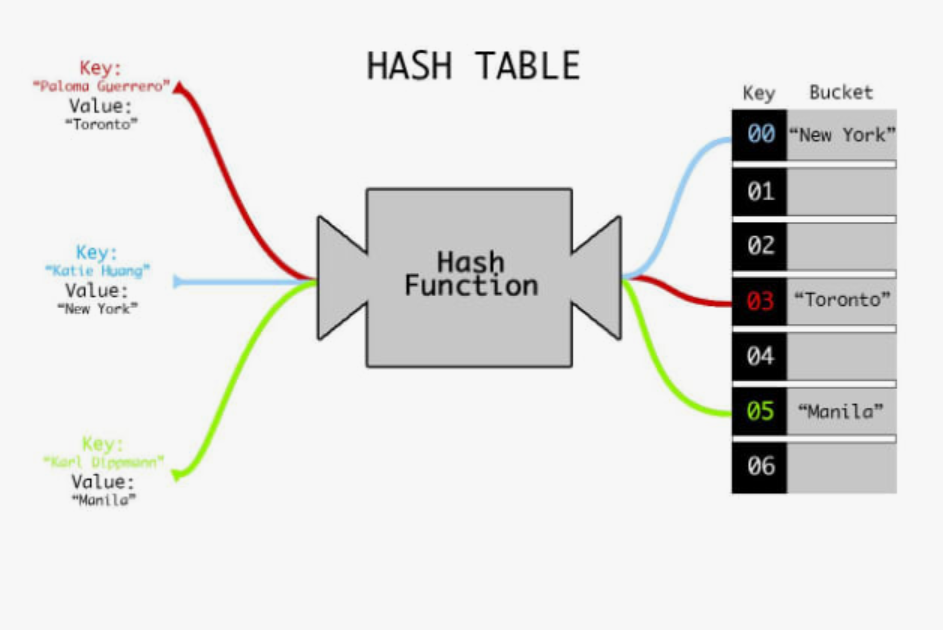

### Фактор загрузки

Это отношение количества элементов в таблице к её текущей ёмкости (количеству ячеек).

**Пример**: если в хэш-таблице 10 элементов и размер массива 20, фактор загрузки — 0,5 (10 / 20).

**Влияние на производительность**: при увеличении фактора загрузки увеличивается вероятность коллизий, что снижает производительность операций поиска, вставки и удаления. Обычно рекомендуется поддерживать фактор загрузки не выше 0,5–0,7.


Хешрейт
$$ \text{Хешрейт} = \frac{n_\text{значение}}{n_\text{бакеты}} $$

In [1]:
10/1e9

1e-08

Если у нас есть десять значений для хранения, но миллиард ячеек...

$$ \text{Хешрейт} = \frac{10}{10^9} = 10^{-8}$$

мы, скорее всего, используем гораздо больше памяти, чем нам нужно. Так бывает всегда, когда коэффициент заполнения ≈ 0

Как общее практическое правило, "золотая середина" заключается в поддержании коэффициента заполнения между 0.6 и 0.75, что обеспечивает баланс между памятью и временной сложностью.

Ниже 0.6 —  потенциально тратится память впустую на пустые ячейки.
Выше 0.75 — риск получить слишком много коллизий, что ухудшает производительность.

### HashMaps

In [ ]:
# QUICKSORT KINDA
def smallest_number(arr):
  min_value = arr[0]
  min_index = 0
  for i in range(1,len(arr)):
    if arr[i] < min_value:
      min_value = arr[i]
      min_index = i
  return min_index

def sorting(arr):
  newArr = []
  copyArr = list(arr)
  for i in range(len(copyArr)):
    smallest = smallest_number(copyArr)
    newArr.append(copyArr.pop(smallest))
  return newArr

  def sorting_optimized(arr):
    for i in range(len(arr)):
      min_index = i
      for j in range(i+1, len(arr)):
        if arr[j]<arr[min_index]:
          min_index = j
      arr[i],arr[min_index]=arr[min_index],arr[i]
  return arr

In [ ]:
sorting([1,14,3,2,-10,81,18,55,439])

[-10, 1, 2, 3, 14, 18, 55, 81, 439]

In [ ]:
def quicksorting(arr):
    if len(arr) <= 1:
        return arr

    random_index = len(arr) // 2
    pivot = arr[random_index]

    low = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    high = [x for x in arr if x > pivot]

    return quicksorting(low) + middle + quicksorting(high)

In [ ]:
quicksorting([1,14,3,2,-10,81,18,55,439])

[-10, 1, 2, 3, 14, 18, 55, 81, 439]

In [ ]:
import numpy as np

# bubble sort
def bubble_sort(arr):

  n = len(arr)

  for i in range(n-1):
    for j in range(0,n-1):
      if arr[j] > arr[j+1]:
        arr[j],arr[j+1] =arr[j+1],arr[j]
  return arr

l = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
bubble_sort(l)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])